## Obtaining Census Data for Reproduction of Spielman Paper

In [44]:
import pygris
from pygris.utils import shift_geometry
from pygris.utils import erase_water
import cenpy
import pandas as pd
import re

Using the default year of 2021


<AxesSubplot:>

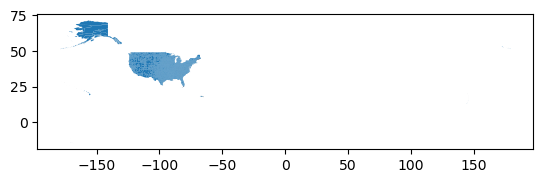

In [2]:
counties = pygris.counties(cb = True)
counties.plot()

<AxesSubplot:>

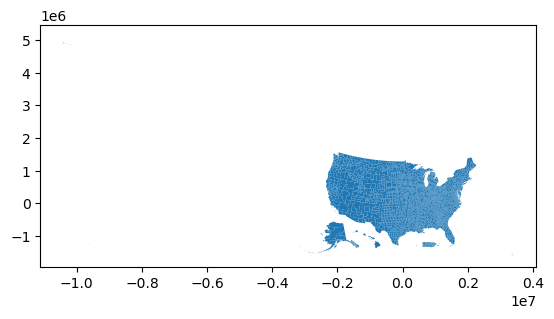

In [3]:
counties_pretty = shift_geometry(counties)
counties_pretty.plot()

In [41]:
pd.options.display.max_rows = 9999

In [43]:
df = pd.DataFrame(cenpy.explorer.available())
rslt_df = df.loc[df['vintage'] == 2012] 
# rslt_df = rslt_df[rslt_df['title'].isin(['5-Year'])]
pd.DataFrame(rslt_df['title'])


title
ACSCP1Y2012                                ACS 1-Year Comparison Profiles
ACSCP3Y2012             American Community Survey: 3-Year Estimates: C...
ACSDP1Y2012                                      ACS 1-Year Data Profiles
ACSDP3Y2012             American Community Survey: 3-Year Estimates: D...
ACSDP5Y2012                                      ACS 5-Year Data Profiles
ACSDT1Y2012                                    ACS 1-Year Detailed Tables
ACSDT3Y2012             American Community Survey: 3-Year Estimates: D...
ACSDT5Y2012                                    ACS 5-Year Detailed Tables
ACSFlows2012            2008-2012 American Community Survey: Migration...
ACSPUMS1Y2012           2012 American Community Survey: 1-Year Estimat...
ACSPUMS1YPR2012         2012 American Community Survey: 1-Year Estimat...
ACSPUMS5Y2012           2008-2012 American Community Survey: 5-Year Es...
ACSPUMS5YPR2012         2008-2012 American Community Survey: 5-Year Es...
ACSSPP1Y2012            American Community Survey: 1-Year Estimates: S...
ACSSPP3Y2012            American Community Survey: 3-Year Estimates: S...
ACSST1Y2012                                     ACS 1-Year Subject Tables
ACSST3Y2012             American Community Survey: 3-Year Estimates: S...
ACSST5Y2012                                     ACS 5-Year Subject Tables
CBP2012                 Annual Economic Surveys: Business Patterns: Co...
CFSAREA2012             Economic Census: Economic Census of the United...
CFSEXPORT2012           Economic Census: Economic Census of the United...
CFSHAZMAT2012           Economic Census: Economic Census of the United...
CFSPRELIM2012           Economic Census: Commodity Flow Survey Prelimi...
CPSASEC2012             Mar 2012 Current Population Survey: Annual Soc...
CPSBASIC201201          Jan 2012 Current Population Survey: Basic Monthly
CPSBASIC201202          Feb 2012 Current Population Survey: Basic Monthly
CPSBASIC201203          Mar 2012 Current Population Survey: Basic Monthly
CPSBASIC201204          Apr 2012 Current Population Survey: Basic Monthly
CPSBASIC201205          May 2012 Current Population Survey: Basic Monthly
CPSBASIC201206          Jun 2012 Current Population Survey: Basic Monthly
CPSBASIC201207          Jul 2012 Current Population Survey: Basic Monthly
CPSBASIC201208          Aug 2012 Current Population Survey: Basic Monthly
CPSBASIC201209          Sep 2012 Current Population Survey: Basic Monthly
CPSBASIC201210          Oct 2012 Current Population Survey: Basic Monthly
CPSBASIC201211          Nov 2012 Current Population Survey: Basic Monthly
CPSBASIC201212          Dec 2012 Current Population Survey: Basic Monthly
CPSDISABILITY201205     May 2012 Current Population Survey: Disability...
CPSDISWORKJOBTEN201201  Jan 2012 Current Population Survey: Displaced ...
CPSFERTILITY201206      Jun 2012 Current Population Survey: Fertility ...
CPSFOODSECURITY201212   Dec 2012 Current Population Survey: Food Secur...
CPSINTERNET201210       Oct 2012 Current Population Survey: Computer a...
CPSPUBLICARTS201207     Jul 2012 Current Population Survey: Public Par...
CPSSCHOOL201210         Oct 2012 Current Population Survey: School Enr...
CPSVETS201208           Aug 2012 Current Population Survey: Veterans S...
CPSVOLUNTEER201209      Sep 2012 Current Population Survey: Volunteeri...
CPSVOTING201211         Nov 2012 Current Population Survey: Voting Sup...
ECNADMBEN2012           Finance and Insurance: Subject Series - Misc S...
ECNBASIC2012            Economic Census: Economic Census of the United...
ECNBRANDDEAL2012        Finance and Insurance: Subject Series - Misc S...
ECNBRIDGE12012          All sectors: Core Business Statistics Series: ...
ECNBRIDGE22012          All sectors: Core Business Statistics Series: ...
ECNBRORDEAL2012         Finance and Insurance: Subject Series - Misc S...
ECNCASHADV2012          Other Services (Except Public Administration):...
ECNCCARD2012            Finance and Insurance: Subject Series - Misc S..

ACSST5Y2012, ACSDT5Y2012, ACSDP5Y2012

In [50]:
cenpy.explorer.explain('ACSDP5Y2012')

{'ACS 5-Year Data Profiles': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, housing, and demographic characteristics of the U.S. population. The ACS 5-year data profiles include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts, all counties, all places and all tracts. The Data profiles contain broad social, economic, housing, and demographic information. The data are presented as both counts and percentages. There are over 2,400 variables in this dataset.'}

In [49]:
cenpy.explorer.explain('ACSDT5Y2012')

{'ACS 5-Year Detailed Tables': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population. Summary files include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts (116th Congress), all counties, all places, and all tracts and block groups. Summary files contain the most detailed cross-tabulations, many of which are published down to block groups. The data are population and housing counts. There are over 64,000 variables in this dataset.'}

In [46]:
cenpy.explorer.explain('ACSST5Y2012')

{'ACS 5-Year Subject Tables': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population. The subject tables include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts, all counties, all places and all tracts. Subject tables provide an overview of the estimates available in a particular topic. The data are presented as both counts and percentages. There are over 66,000 variables in this dataset.'}

I think I want the subject tables? ACSST5Y2012. Need to double check that I am using the right data...

using this for help: https://github.com/earthlab/tutorials/blob/master/python/get-cenus-data-with-cenpy.ipynb

In [119]:
con = cenpy.remote.APIConnection('ACSDT5Y2012')

In [115]:
print(type(con))
print(type(con.geographies))
print(con.geographies.keys())

<class 'cenpy.remote.APIConnection'>
<class 'dict'>
dict_keys(['fips'])


In [120]:
# print head of data frame in the geographies dictionary
con.geographies['fips'].head()

name geoLevelDisplay referenceDate requires wildcard optionalWithWCFor
0        us             010    2012-01-01      NaN      NaN               NaN
1    region             020    2012-01-01      NaN      NaN               NaN
2  division             030    2012-01-01      NaN      NaN               NaN
3     state             040    2012-01-01      NaN      NaN               NaN
4    county             050    2012-01-01  [state]  [state]             state

In [117]:
g_unit = 'county:*'
g_filter = {'state':'8'}

In [121]:
var = con.variables
print('Number of variables in', 'dataset', ':', len(var))
con.variables

Number of variables in dataset : 22567


label  \
for                                Census API FIPS 'for' clause   
in                                  Census API FIPS 'in' clause   
ucgid                Uniform Census Geography Identifier clause   
B99104_007E   Estimate!!Total!!Not living with own grandchil...   
B24022_060E   Estimate!!Total!!Female!!Service occupations!!...   
...                                                         ...   
B20005I_071E  Estimate!!Total!!Female!!Worked full-time, yea...   
B16005_017E   Estimate!!Total!!Native!!Speak Asian and Pacif...   
B08113_054E   Estimate!!Total!!Worked at home!!Speak other l...   
B05009_012E   Estimate!!Total!!Under 6 years!!Living with tw...   
B06009_006E    Estimate!!Total!!Graduate or professional degree   

                                                        concept predicateType  \
for                          Census API Geography Specification      fips-for   
in                           Census API Geography Specification       fips-in   
ucgid                        Census API Geography Specification         ucgid   
B99104_007E   IMPUTATION OF LENGTH OF TIME GRANDPARENT RESPO...           int   
B24022_060E   SEX BY OCCUPATION AND MEDIAN EARNINGS IN THE P...           int   
...                                                         ...           ...   
B20005I_071E  SEX BY WORK EXPERIENCE IN THE PAST 12 MONTHS B...           int   
B16005_017E   NATIVITY BY LANGUAGE SPOKEN AT HOME BY ABILITY...           int   
B08113_054E   MEANS OF TRANSPORTATION TO WORK BY LANGUAGE SP...           int   
B05009_012E   AGE AND NATIVITY OF OWN CHILDREN UNDER 18 YEAR...           int   
B06009_006E   PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN TH...           int   

                group limit predicateOnly hasGeoCollectionSupport  \
for               N/A     0          True                     NaN   
in                N/A     0          True                     NaN   
ucgid             N/A     0          True                    True   
B99104_007E    B99104     0           NaN                     NaN   
B24022_060E    B24022     0           NaN                     NaN   
...               ...   ...           ...                     ...   
B20005I_071E  B20005I     0           NaN                     NaN   
B16005_017E    B16005     0           NaN                     NaN   
B08113_054E    B08113     0           NaN                     NaN   
B05009_012E    B05009     0           NaN                     NaN   
B06009_006E    B06009     0           NaN                     NaN   

                                            attributes required values  
for                                                NaN      NaN    NaN  
in                                                 NaN      NaN    NaN  
ucgid                                              NaN      NaN    NaN  
B99104_007E                               B99104_007EA      NaN    NaN  
B24022_060E      B24022_060EA,B24022_060M,B24022_060MA      NaN    NaN  
...                                                ...      ...    ...  
B20005I_071E  B20005I_071EA,B20005I_071M,B20005I_071MA      NaN    NaN  
B16005_017E      B16005_017EA,B16005_017M,B16005_017MA      NaN    NaN  
B08113_054E      B08113_054EA,B08113_054M,B08113_054MA      NaN    NaN  
B05009_012E      B05009_012EA,B05009_012M,B05009_012MA      NaN    NaN  
B06009_006E      B06009_006EA,B06009_006M,B06009_006MA      NaN    NaN  

[22567 rows x 10 columns]

In [57]:


datasets = list(cenpy.explorer.available(verbose=True).items())

# print first rows of the dataframe containing datasets
pd.DataFrame(datasets)



0                                                  1
0        c_isTimeseries  ABSCB2017                              NaN
ABS...
1              temporal  ABSCB2017                                     ...
2               spatial  ABSCB2017                                     ...
3         c_isAggregate  ABSCB2017                             True
ABS...
4             publisher  ABSCB2017                             U.S. Cen...
5            references  ABSCB2017                             https://...
6           programCode  ABSCB2017                             006:007
...
7              modified  ABSCB2017                             2020-04-...
8               license  ABSCB2017                             https://...
9               keyword  ABSCB2017                                     ...
10       identifier_url  ABSCB2017                                     ...
11         contactPoint  ABSCB2017                             {'fn': '...
12         distribution  ABSCB2017                             {'@type'...
13          description  ABSCB2017                             The Annu...
14           bureauCode  ABSCB2017                             006:07
A...
15          accessLevel  ABSCB2017                             public
A...
16                title  ABSCB2017                             Economic...
17        c_isAvailable  ABSCB2017                             True
ABS...
18             c_isCube  ABSCB2017                              NaN
ABS...
19        c_isMicrodata  ABSCB2017                              NaN
ABS...
20  c_documentationLink  ABSCB2017                             https://...
21            c_dataset  ABSCB2017                                     ...
22              vintage  ABSCB2017                             2017.0
A...

In [68]:
cenpy.remote.APIConnection.query?

Signature:
cenpy.remote.APIConnection.query(
    self,
    cols=None,
    geo_unit='',
    geo_filter={},
    apikey='',
    **kwargs,
)
Docstring:
Conduct a query over the USCB api connection

Parameters
-----------
cols : list of str
       census column names to request
geo_unit : dict or str 
           identifiers for the basic spatial unit of the query
geo_filter : dict 
             required geometries above the specified geo_unit needed 
             to complete the query
apikey : str
         USCB-issued API key for your query.
**kwargs : additional search predicates can be passed here

Returns
--------
pandas.DataFrame
    results from the API

Example
--------
To grab the total population of all of the census blocks in a part of Arizona:

    >>> cxn.query('P0010001', geo_unit = 'block:*', geo_filter = {'state':'04','county':'019','tract':'001802'})

Notes
------

If your list of columns exceeds the maximum query length of 50,
the query will be broken up and concatenated bac

In [70]:
data = con.query(cols=cols, geo_unit=g_unit, geo_filter=g_filter, apikey="e616ed8d31a4c6246c87db97b25d249b83da19ff")

HTTPError: 400 error: error: unknown variable 'label'

In [ ]:
usa = products.ACS(2013).from_place('Chicago, IL', level='tract',
                                        variables=['B00002*', 'B01002H_001E'])

# I think the following is what I want

In [72]:
import pygris

In [171]:
variables = ["S0601_C01_001E", # total pop (CHECKED)
             "S0601_C01_017E", # total asian (FOR SOME REASON, PERCENTAGE. ALSO 3RD LINE OFF)
             "S0601_C01_015E", # total black (FOR SOME REASON THIS APPEARS TO BE A PERCENTAGE)
             "S0601_C01_021E", # total latinx
             "S0601_C01_016E", # total native
             "S0601_C01_002E", # total under 5
             "S0601_C01_008E", # total 65-74
             "S0601_C01_009E", # total 75+
            
                 # Percent Children Living in 2-Parent Families
             # unsure about this section -- seems like multiple entries of both of the folowing
             "S0901_C01_001E", # total children (under 18 yrs)
             "S0901_C02_001E", # total children in married-couple households
             
             "S0601_C01_010E", # median age (CHECKED)
                 # Percent Households Receiving Social Security Benefits
             "S0601_C01_048E", # total for which poverty status known
             "S0601_C01_049E", # total below 100% of poverty line
             # Percent Households Earning over $200,000 Annually:
             "S2503_C01_001E", # occupied households number
             "S2503_C01_012E", # total occuppied households with $150,000 income or more
             "S0601_C01_047E", # median income (does per capita imply mean?)
                 # Percent Speaking English as a Second Language with Limited English Proficiency
             "S0601_C01_012E", # total female
             
                 # Percent Female Headed Households
             "S1101_C04_001E", # is this what we're looking for??? Female householder, no husband present, family household!!Estimate!!Total households
             "S2501_C01_019E", # also this option??? Occupied housing units!!Estimate!!HOUSEHOLD TYPE (INCLUDING LIVING ALONE) AND AGE OF HOUSEHOLDER!!Family households!!Other family!!Female householder, no husband present
                 # Nursing Home Residents Per Capita
                 # Hospitals per Capita (County Level ONLY) 
                 # Percent of Population without Health Insurance
             "S2701_C01_001E", # Total!!Estimate!!Total civilian noninstitutionalized population
             "S2701_C01_046E", # Total!!Estimate!!PERCENT IMPUTED!!Health insurance coverage
             "S2701_C02_001E", # Number Uninsured!!Estimate!!Total civilian noninstitutionalized population
             
             
             "S0601_C01_032E", # check this: think it's the total for which they have educational information on
             "S0601_C01_033E", # total with less than 12th Grade Education
                 # Percent Civilian Unemployment
                 # People per Unit

                 # Percent Renters
                     # which one?
             "S2501_C01_001E", # total occupied housing units
             "S1101_C01_001E", # total households or S1101_C01_009E?
                      # which one?
             "S1101_C01_020E", # total renter-occupied housing units (used for % renters??) 
             "S2501_C03_001E", # "Renter-occupied housing units!!Estimate!!Occupied housing units"
            
                 # Median Housing Value
                 # Median Gross Rent
                 # Percent Mobile Homes
             "S1101_C01_018E", # total number of mobile homes
                 # Percent Employment in Extractive Industries
                 # Percent Employment in Service Industry
                 # Percent Female Participation in Labor Force
             # Percent of Housing Units with No Car
             "S2504_C01_001E", # total occupied housing units
             "S2504_C01_026E", # total occupied housing units with no vehicle available
             "S0501_C01_016E"
             
                 # Percent Unoccupied Housing Units
                 # Percent of All Households Spending More than 40% of Their Income on Housing Expenses (Tract Level ONLY)
                ]

In [172]:
from pygris.data import get_census
counties_pop = get_census(dataset = "acs/acs5/subject", # dataset name on the Census API you are connecting to; find datasets at https://api.census.gov/data.html
                        variables = variables, # string (or list of strings) of desired vars. For the 2021 5-year ACS Data Profile, those variable IDs are found at https://api.census.gov/data/2021/acs/acs5/profile/variables.html.
                        year = 2012, # year of your data (or end-year for a 5-year ACS sample)
                        params = { # dict of query parameters to send to the API.
                          "for": "county:*"},#,
                          # "in": "state:36"},
                        guess_dtypes = True,
                        return_geoid = True)

In [151]:
# Data manipulations
counties_pop["BLACK"] = counties_pop["S0601_C01_015E"]/counties_pop["S0601_C01_001E"]

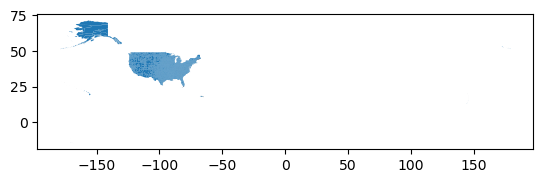

In [102]:
from pygris import counties
counties_shp = counties(cb = True,
                    year = 2021, cache = True)
counties_shp.plot();

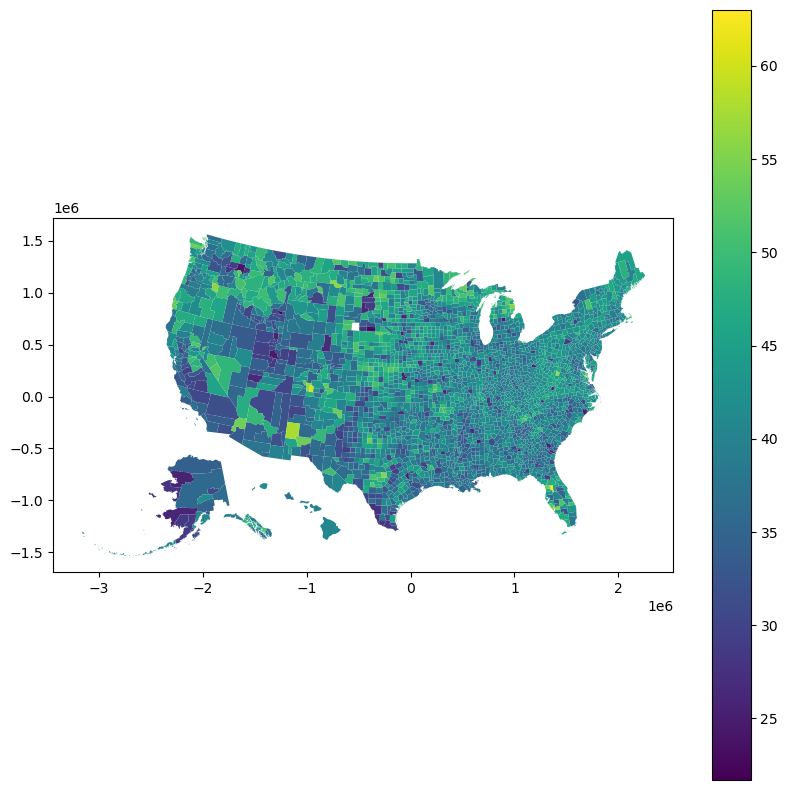

In [152]:
# Joining the data and mapping it
counties = counties_shp.merge(counties_pop, how = "inner", on = "GEOID")
counties_pretty = shift_geometry(counties)
counties_pretty.plot(column = "S0601_C01_010E", legend = True, figsize = (10, 10)); # believe plot() from gpd

In [127]:
# Bringing in data from the paper
import os

pd.set_option("chained_assignment", None)
make_strings = {'Geo_FIPS': object, 'Geo_STATE': object, 'Geo_COUNTY': object,
                'Geo_TRACT': object, 'Geo_CBSA': object, 'Geo_CSA': object}
# path = os.getcwd()
path = os.path.dirname(os.getcwd()) # if running from the 'code' directory
outPath=os.path.join(path,'data')
ipath = os.path.join(path,'data','input')
spath = os.path.join(path,'data','spatial')
acs = pd.read_csv(os.path.join(ipath, 'sovi_acs.csv'),
                  dtype=make_strings, skiprows=1,encoding='latin-1')

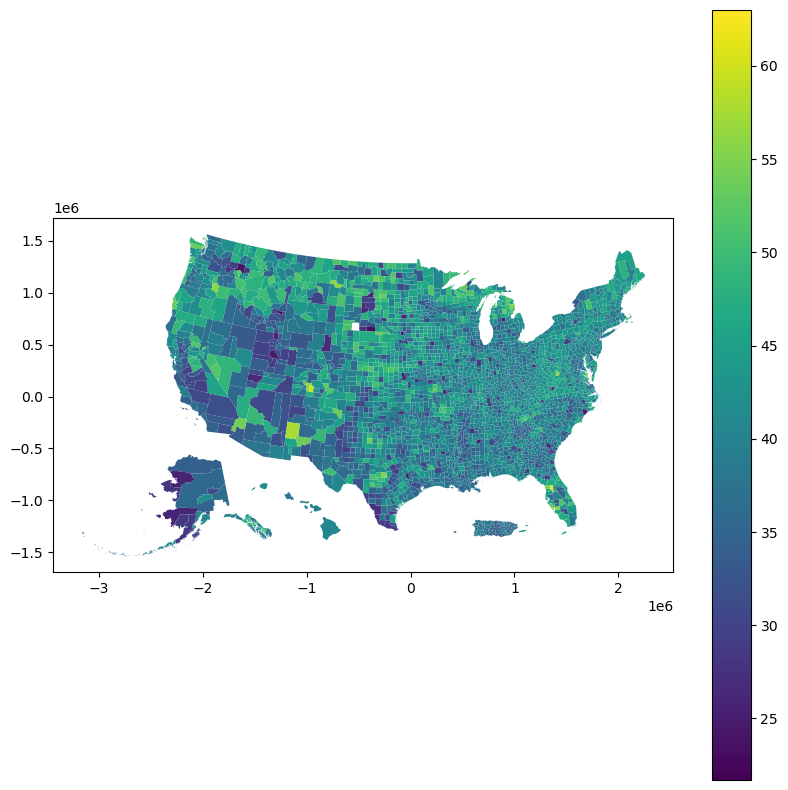

In [138]:
# Joining the data and mapping it
counties_paper = counties_shp.merge(acs, how = "inner", left_on = "GEOID", right_on = "Geo_FIPS")
counties_pretty_paper = shift_geometry(counties_paper)
counties_pretty_paper.plot(column = "ACS12_5yr_B01002001", legend = True, figsize = (10, 10)); # believe plot() from gpd

# Checking my numbers match those in the paper

### Median Age

In [149]:
counties[[ "GEOID", "S0601_C01_010E"]].sort_values(by = "GEOID").head(10)

GEOID  S0601_C01_010E
868   01001            37.0
1313  01003            41.2
791   01005            38.2
2682  01007            39.4
1046  01009            39.1
2329  01011            40.7
1578  01013            40.3
2336  01015            38.7
2794  01017            41.4
2849  01019            44.3

In [150]:
counties_paper[["Geo_FIPS", "ACS12_5yr_B01002001"]].sort_values(by = "Geo_FIPS").head(10)

Geo_FIPS  ACS12_5yr_B01002001
868     01001                 37.0
1313    01003                 41.2
791     01005                 38.2
2682    01007                 39.4
1046    01009                 39.1
2329    01011                 40.7
1578    01013                 40.3
2336    01015                 38.7
2794    01017                 41.4
2849    01019                 44.3

## Total population

In [162]:
counties[[ "GEOID", "S0601_C01_001E"]].sort_values(by = "GEOID").head(10)

GEOID  S0601_C01_001E
868   01001         54590.0
1313  01003        183226.0
791   01005         27469.0
2682  01007         22769.0
1046  01009         57466.0
2329  01011         10779.0
1578  01013         20730.0
2336  01015        117834.0
2794  01017         34228.0
2849  01019         25917.0

## Percent Black

In [175]:
counties_pop[[ "GEOID", "S0601_C01_015E"]].sort_values(by = "GEOID").head(10)

GEOID  S0601_C01_015E
3210  01001            18.1
1203  01003             9.3
3201  01005            46.0
3202  01007            21.8
3208  01009             1.3
3203  01011            70.6
3194  01013            43.2
3204  01015            20.7
1473  01017            39.2
2763  01019             4.8

## Percent Asian

In [176]:
counties_pop[[ "GEOID", "S0601_C01_017E"]].sort_values(by = "GEOID").head(10)

GEOID  S0601_C01_017E
3210  01001             0.8
1203  01003             0.7
3201  01005             0.8
3202  01007             0.1
3208  01009             0.2
3203  01011             0.0
3194  01013             0.9
3204  01015             0.7
1473  01017             0.5
2763  01019             0.3